In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.util import ngrams
import collections
from wordcloud import WordCloud

In [2]:
DATABASE_PATH = 'database_old.sqlite3'

In [3]:
connection = sqlite3.connect(DATABASE_PATH)
dataframe = pd.read_sql('SELECT descripcion_filtrado, categoria FROM licitaciones', connection)
num_classes = len(np.unique(dataframe['categoria']))
samples = dataframe['descripcion_filtrado'].values

print('El total de muestras es: ', len(samples))
print('El total de clases es: ', len(np.unique(dataframe['categoria'])))
dataframe.tail()

El total de muestras es:  19180
El total de clases es:  7


,descripcion_filtrado,categoria
19175,EL COMODANTE HACE ENTREGA A TITULO DE COMODATO...,G
19176,ENCERRAMIENTO Y DELIMITACION DE PREDIOS MUNICI...,G
19177,"ARRENDAMIENTO DE UN BIEN INMUEBLE, COMO SEDE D...",G
19178,MEJORAMIENTO Y REPARCHEO DE PAVIMIENTO EN CONC...,G
19179,MANTENIMIENTO Y MEJORAMIENTO DE CAMINOS VEREDA...,G


,descripcion_filtrado
categoria,
A,183
B,590
C,546
D,957
E,2919
F,13602
G,383


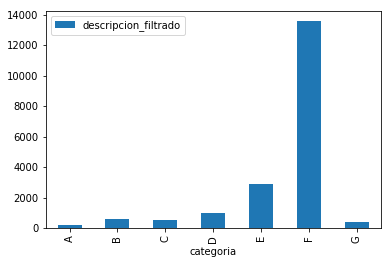

In [4]:
dataframe.groupby('categoria').count().plot(kind='bar')
dataframe.groupby('categoria').count()

## Métricas para la decisión del modelo de clasificación.

De acuerdo a [Google](https://developers.google.com/machine-learning/guides/text-classification/step-2-5), cuando el ratio de $ \frac{muestras}{palabras por muestra} $ es inferior a 1500, lo recomendable es vectorizar el texto como N-gramas y además seguir algunas opciones que se encuentran en la página como lo son: la forma de contar, el método para clasificar, el método de normalización, etc...

In [5]:
num_words = [len(sample.split()) for sample in samples]
med_num_words = np.median(num_words)
print('El número medio de palabras en una muestra es: ', med_num_words)
print('El ratio de muestras / palabras por muestra es: ', len(samples) / med_num_words)

El número medio de palabras en una muestra es:  25.0
El ratio de muestras / palabras por muestra es:  767.2


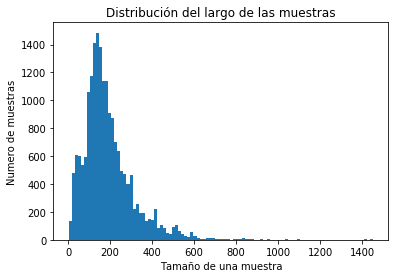

In [6]:
plt.hist([len(s) for s in samples], 100)
plt.xlabel('Tamaño de una muestra')
plt.ylabel('Numero de muestras')
plt.title('Distribución del largo de las muestras')
plt.show()

## Frecuencia de n-gramas sin limpieza

Para los siguientes diagramas de barras se muestra la frecuencia con que se repiten n-gramas de 1, 2, 3 y 4 palabras sin hacer ningun proceso de limpieza más allá que pasar a minuscula el texto.

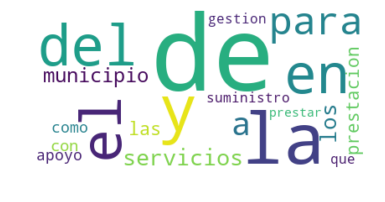

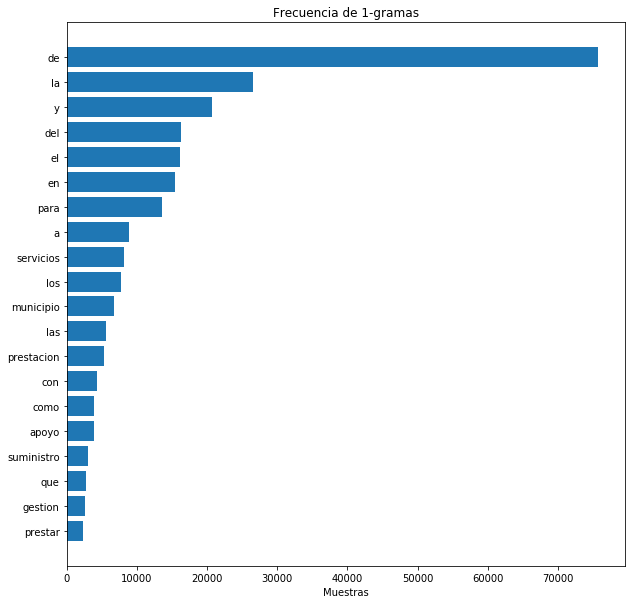

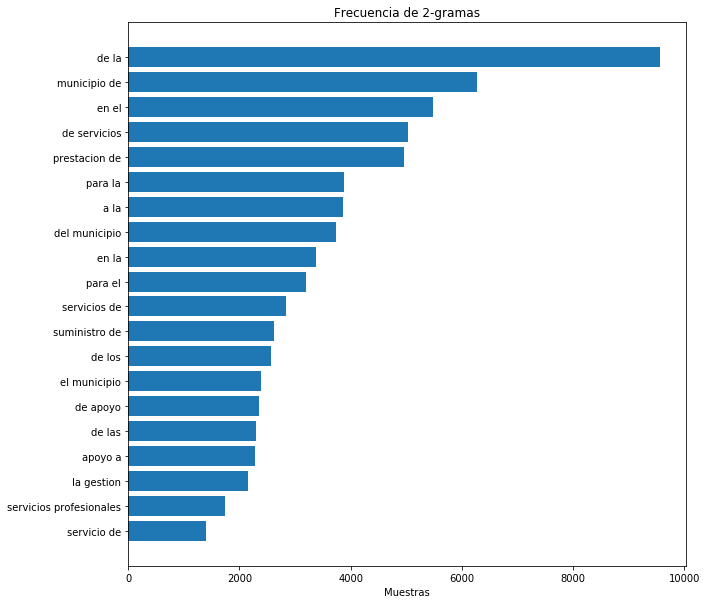

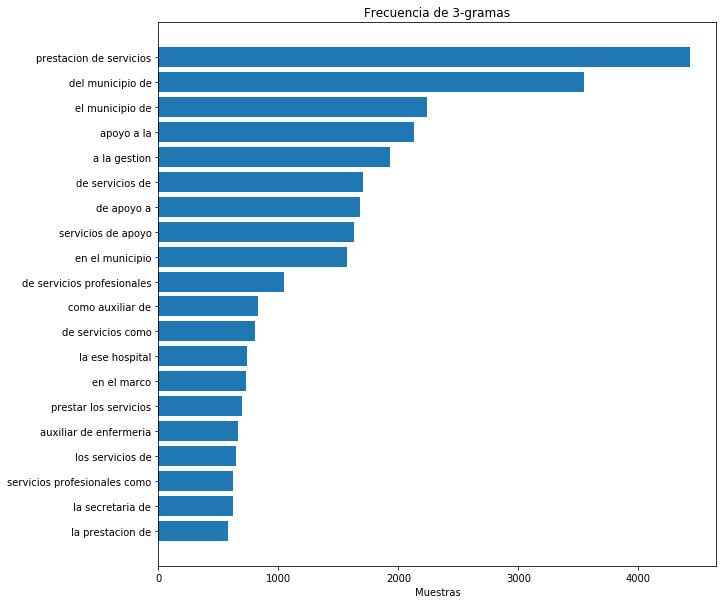

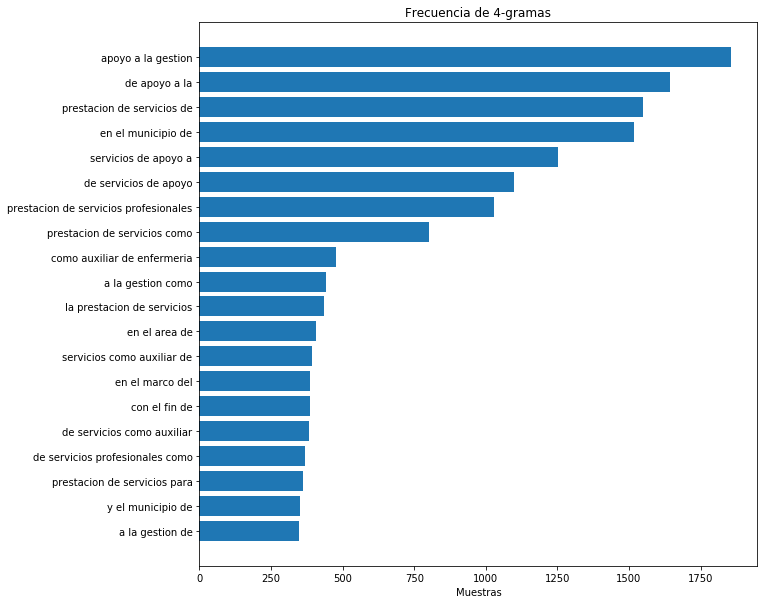

In [7]:
whole = ' '.join(samples).casefold()

for i in range(1, 5):
    n_grams = ngrams(whole.split(), i)
    result = collections.Counter(n_grams).most_common(20)

    labels = []
    values = []
    for label, value in result:
        labels.append(' '.join(label))
        values.append(value)
        
    if i == 1:
        words_dict = dict(zip(labels, values))
        wordcloud = WordCloud(background_color='white')
        wordcloud.generate_from_frequencies(words_dict)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.figure(figsize=(10, 10))
    plt.barh(labels, values)
    plt.title('Frecuencia de {}-gramas'.format(i))
    plt.xlabel('Muestras')
    plt.gca().invert_yaxis()
    plt.show()

## Frecuencia de n-gramas con limpieza de stopwords y signos de puntuación

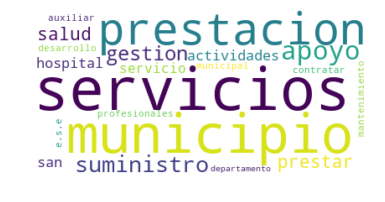

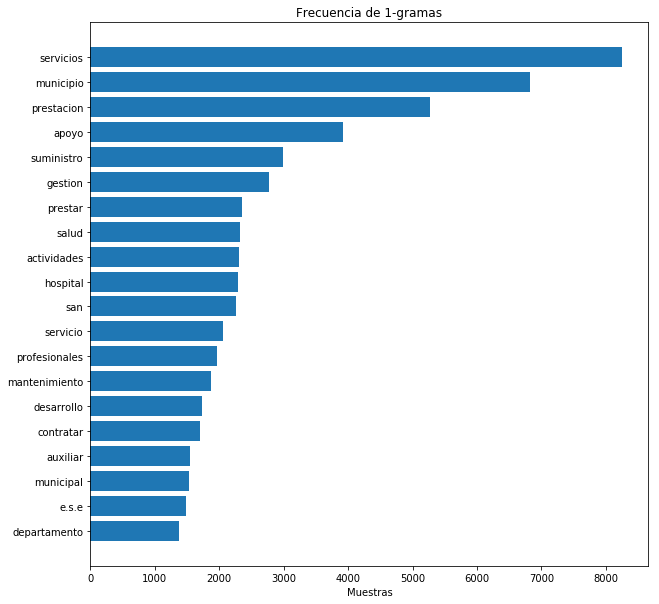

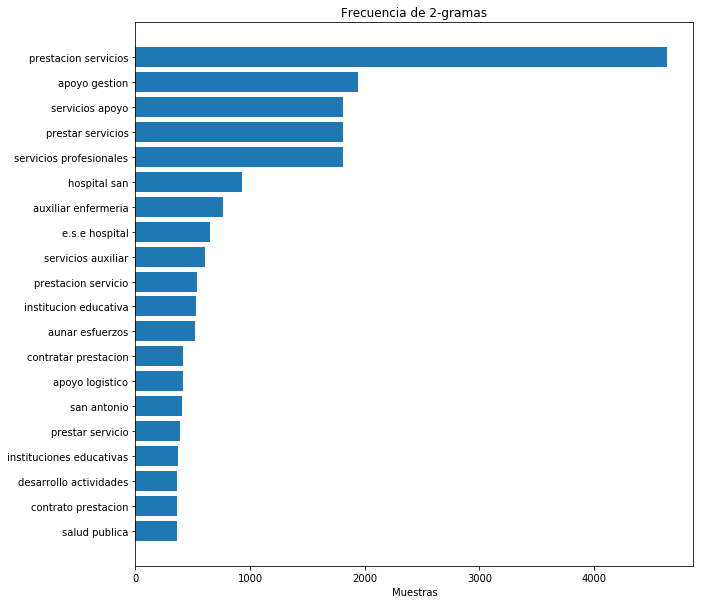

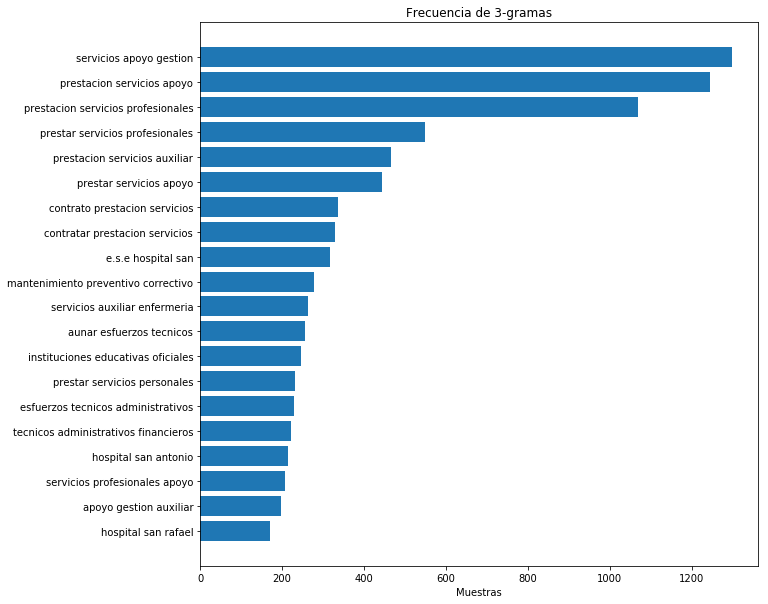

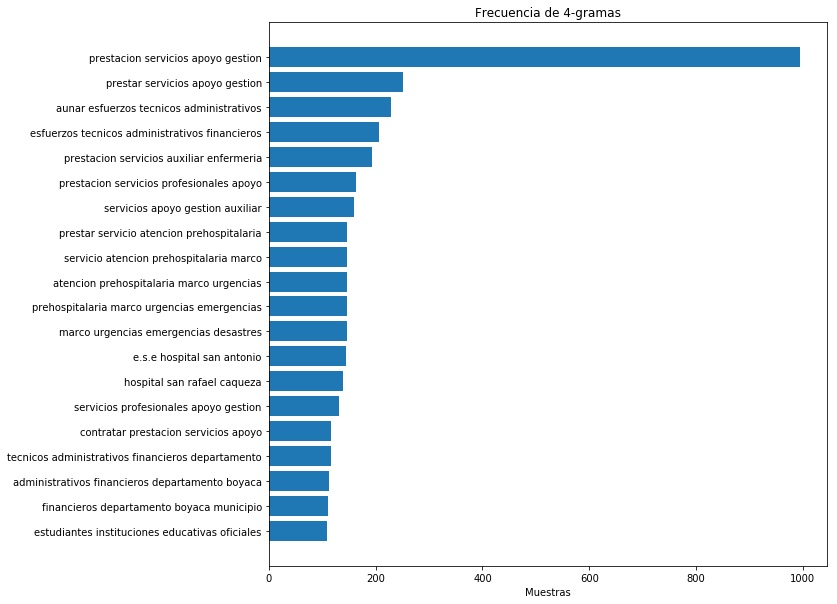

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

whole = ' '.join(samples).casefold()

stop_words = set(stopwords.words('spanish'))
word_tokens = word_tokenize(whole)
filtered_whole = []

for w in word_tokens:
    if w not in stop_words and w not in [',', '.', '-', '_']:
        filtered_whole.append(w)

for i in range(1, 5):
    n_grams = ngrams(filtered_whole, i)
    result = collections.Counter(n_grams).most_common(20)

    labels = []
    values = []
    for label, value in result:
        labels.append(' '.join(label))
        values.append(value)
        
    if i == 1:
        words_dict = dict(zip(labels, values))
        wordcloud = WordCloud(background_color='white')
        wordcloud.generate_from_frequencies(words_dict)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.figure(figsize=(10, 10))
    plt.barh(labels, values)
    plt.title('Frecuencia de {}-gramas'.format(i))
    plt.xlabel('Muestras')
    plt.gca().invert_yaxis()
    plt.show()

## Frecuencia de n-gramas con limpieza y lematización de palabras.

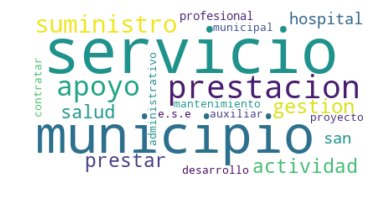

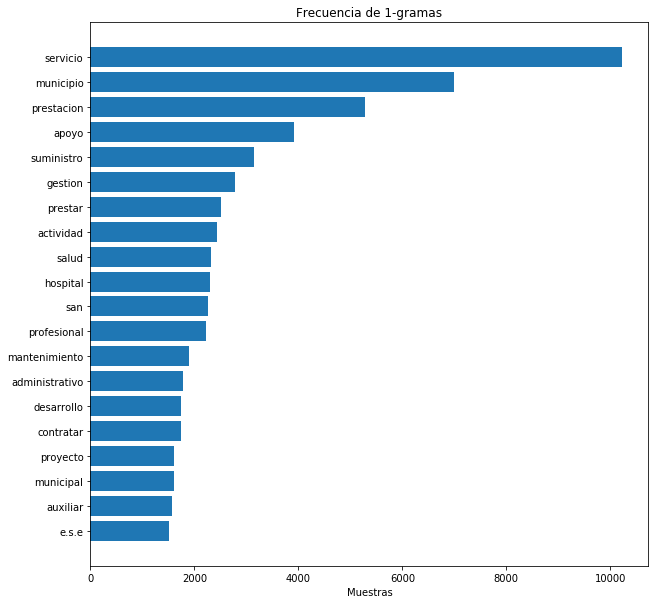

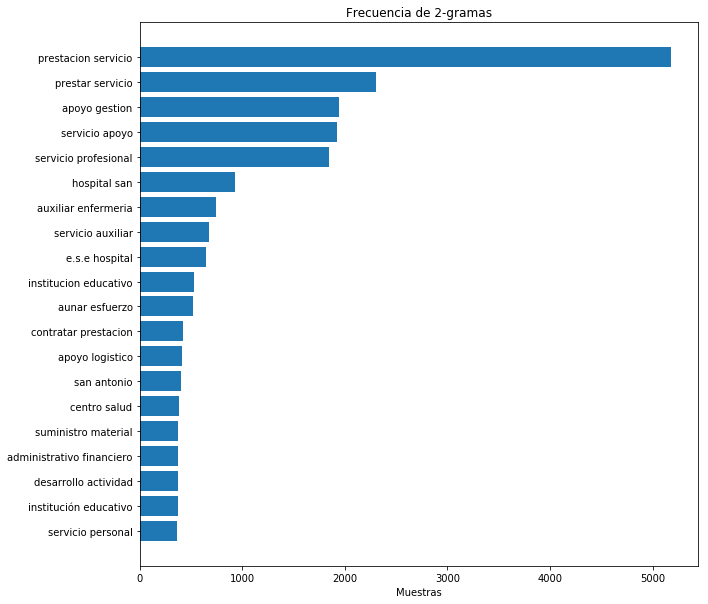

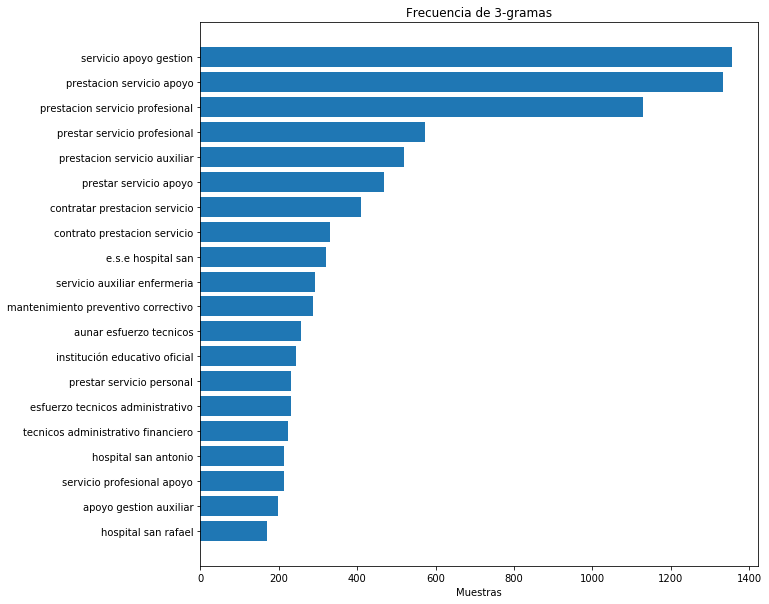

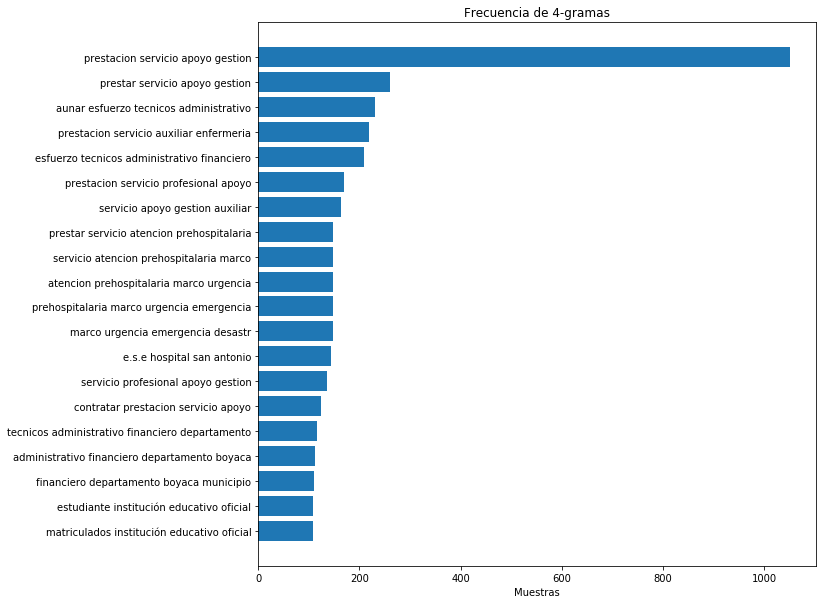

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pattern.es as lem

whole = ' '.join(samples).casefold()
whole = ' '.join(lem.Sentence(lem.parse(whole, lemmata=True)).lemmata)

stop_words = set(stopwords.words('spanish'))
word_tokens = word_tokenize(whole)
filtered_whole = []

for w in word_tokens:
    if w not in stop_words and w not in [',', '.', '-', '_']:
        filtered_whole.append(w)

for i in range(1, 5):
    n_grams = ngrams(filtered_whole, i)
    result = collections.Counter(n_grams).most_common(20)

    labels = []
    values = []
    for label, value in result:
        labels.append(' '.join(label))
        values.append(value)
    if i == 1:
        words_dict = dict(zip(labels, values))
        wordcloud = WordCloud(background_color='white')
        wordcloud.generate_from_frequencies(words_dict)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")


    plt.figure(figsize=(10, 10))
    plt.barh(labels, values)
    plt.title('Frecuencia de {}-gramas'.format(i))
    plt.xlabel('Muestras')
    plt.gca().invert_yaxis()
    plt.show()

## Frecuencia de n-gramas por categoria

('A', 'Material Vivo Animal y Vegetal')


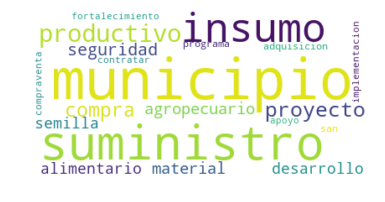

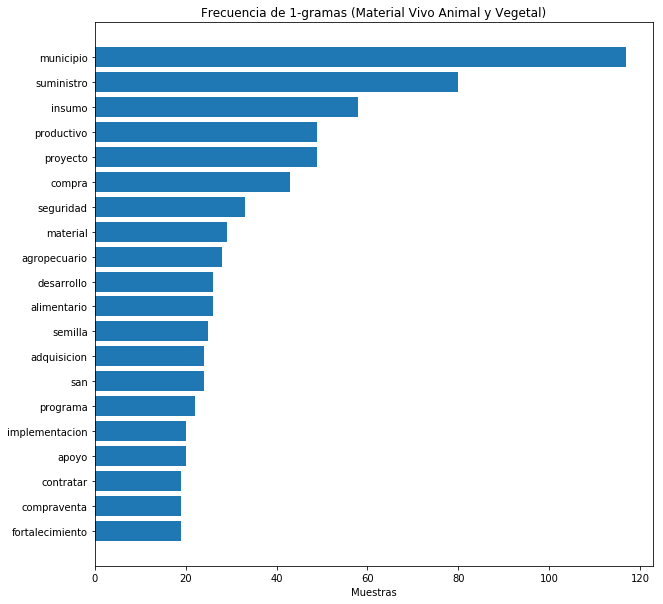

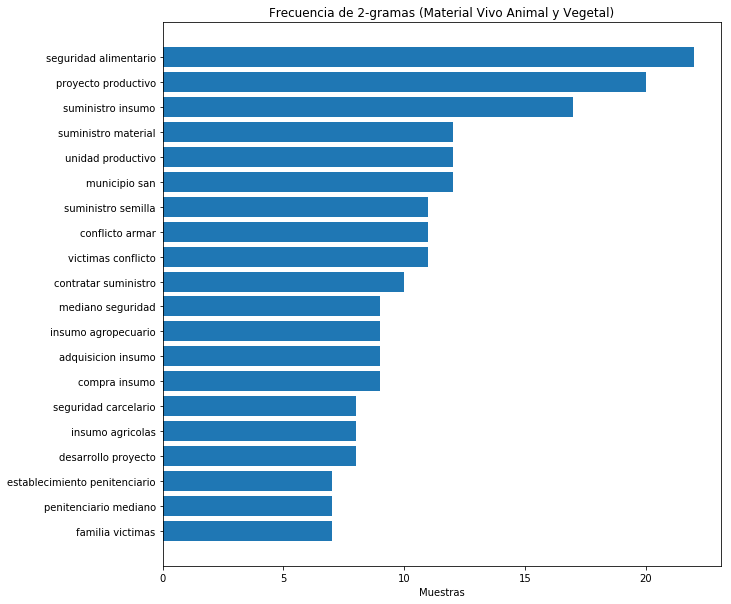

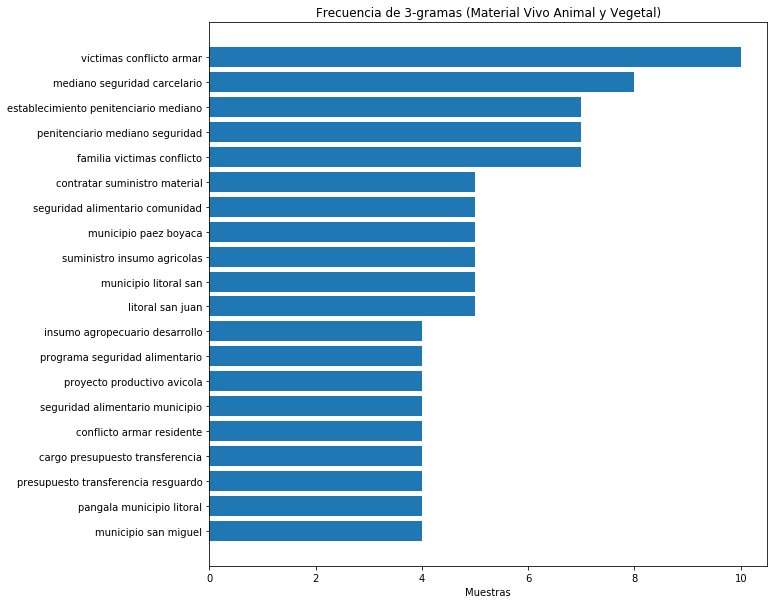

('B', 'Materias Primas')


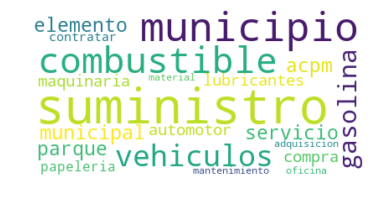

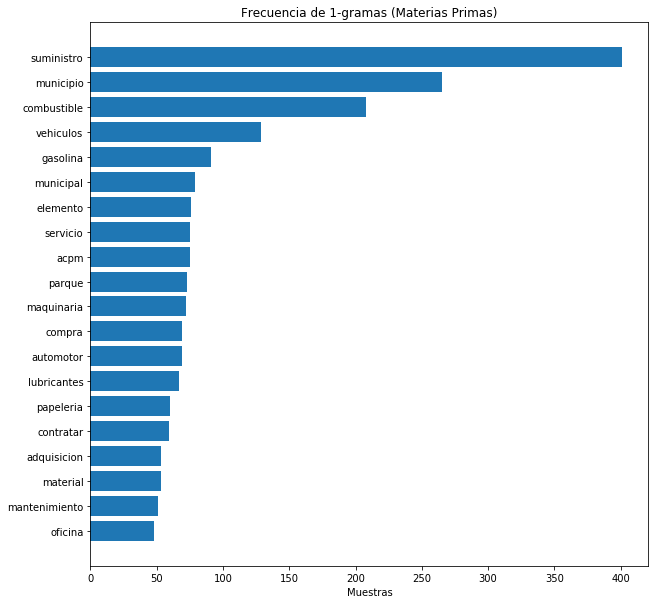

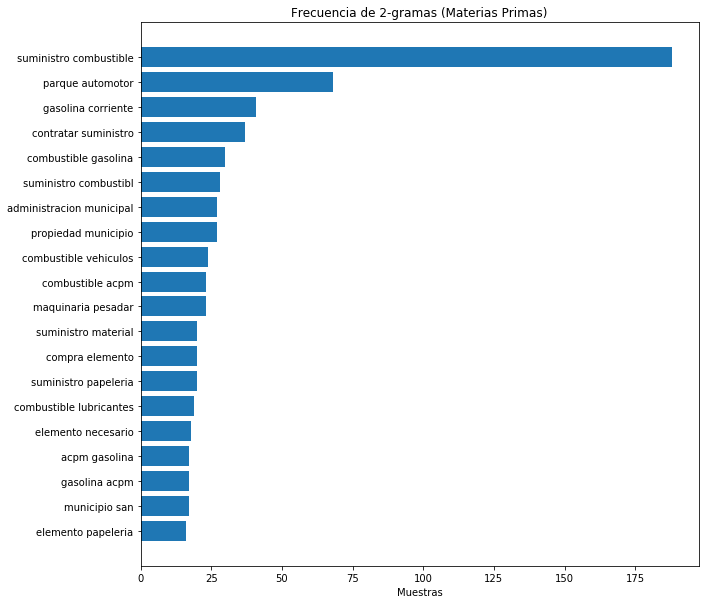

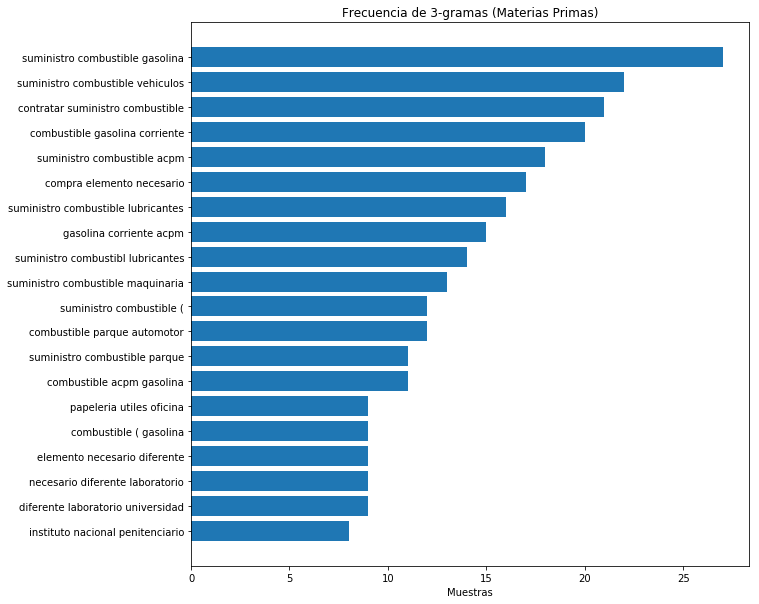

('C', 'Maquinaria, Herramientas, Equipo Industrial y Vehículos')


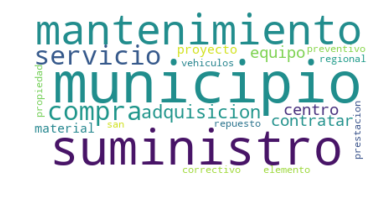

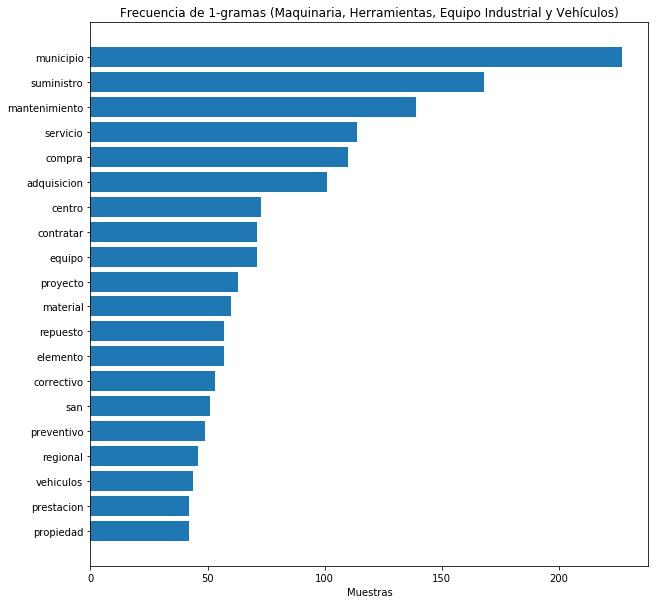

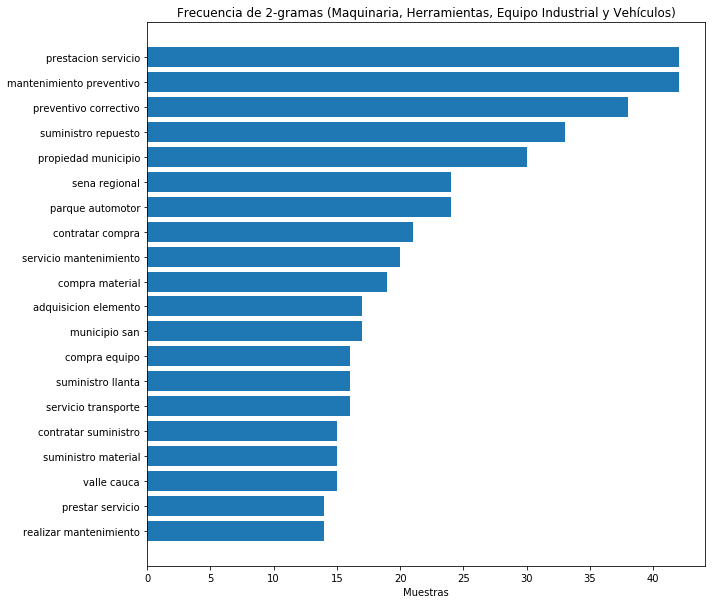

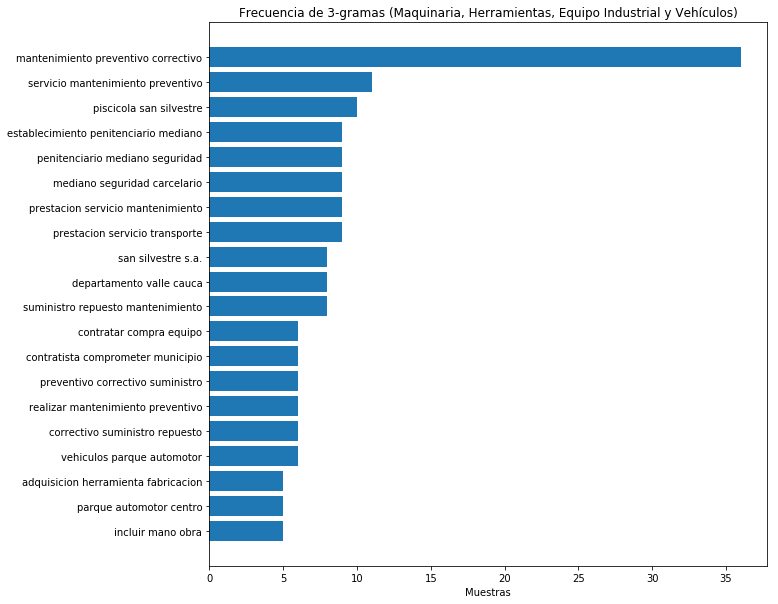

('D', 'Componentes y Suministros')


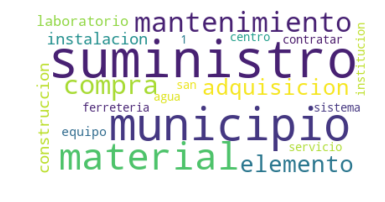

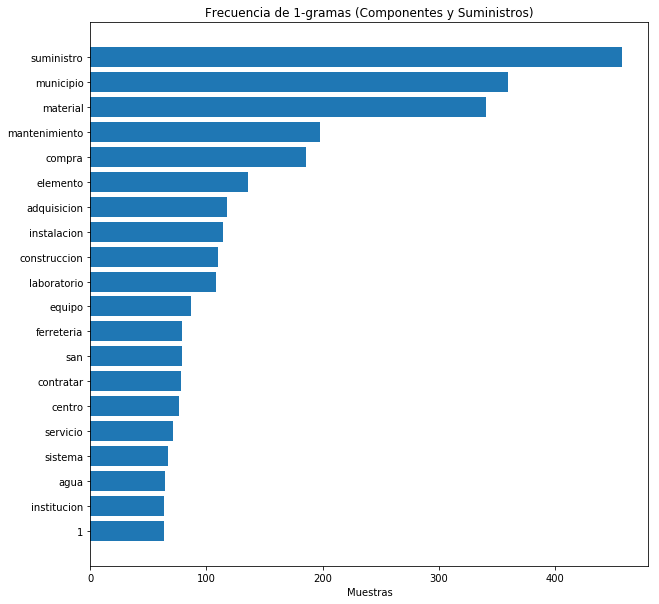

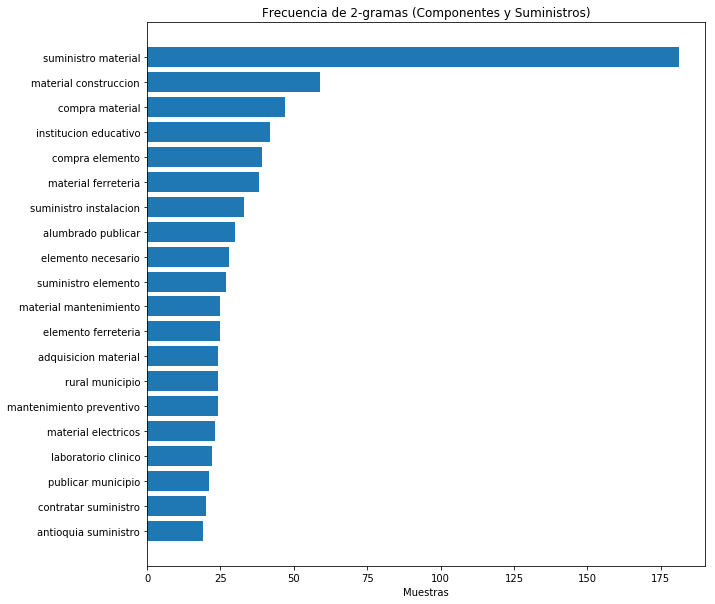

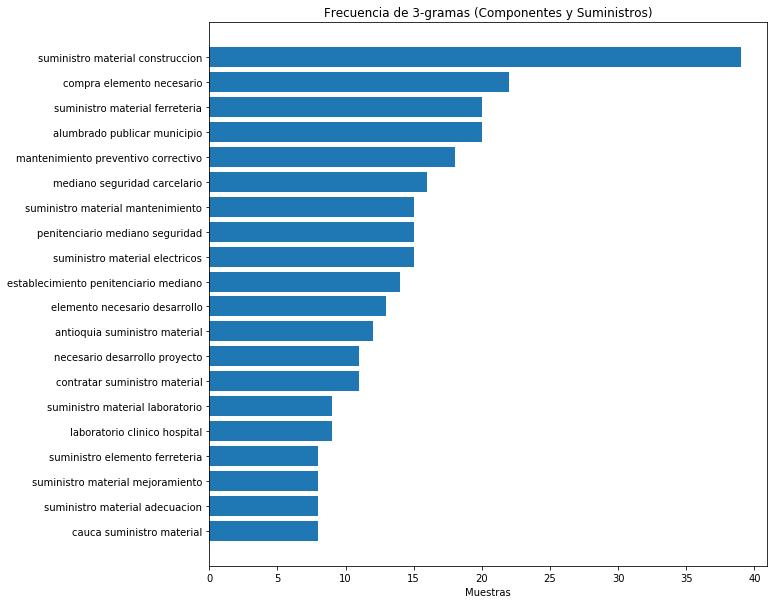

('E', 'Productos de Uso Final')


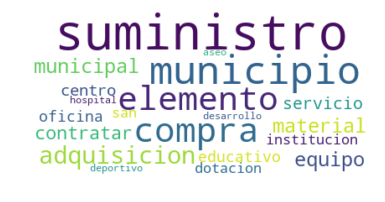

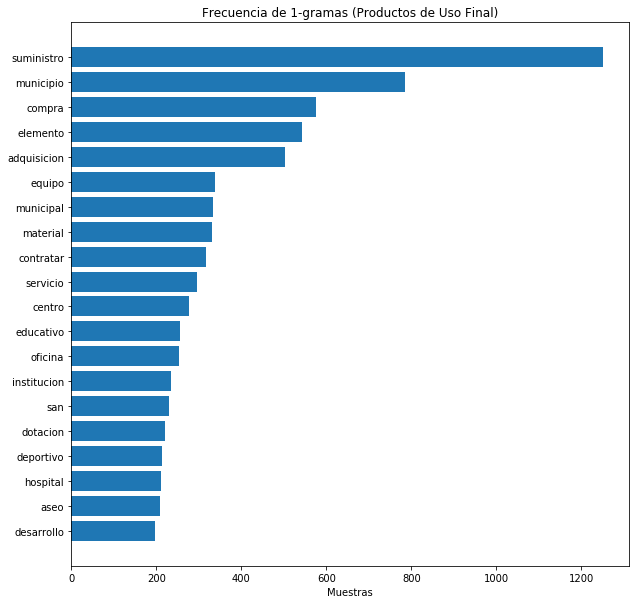

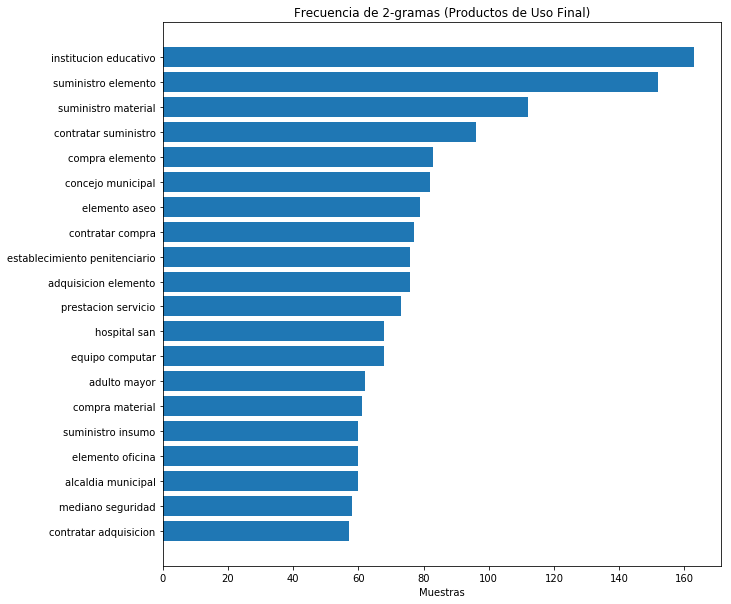

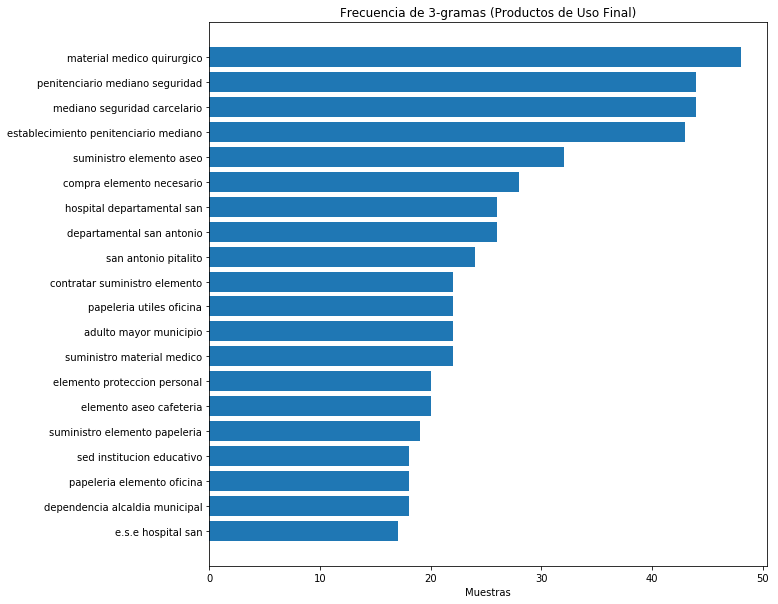

('F', 'Servicios')


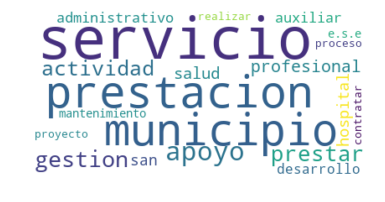

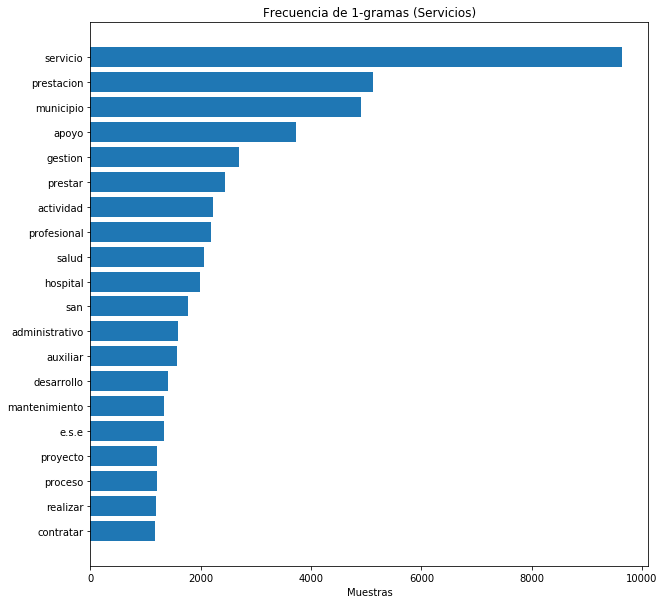

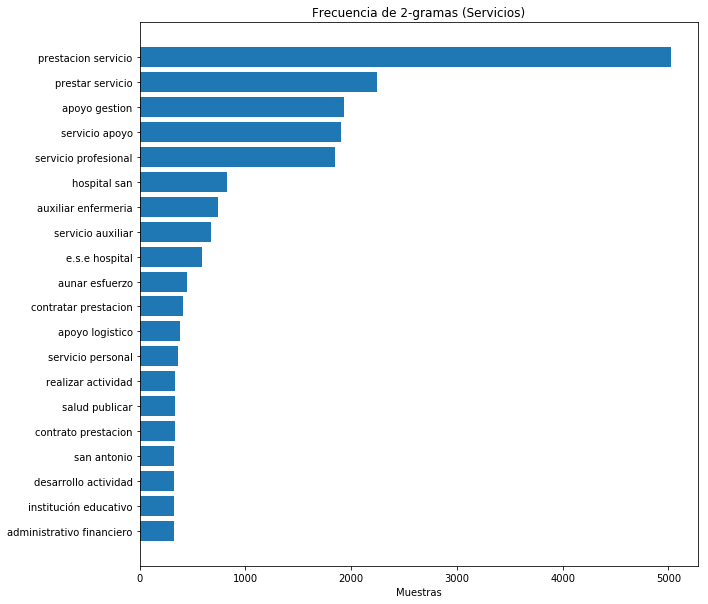

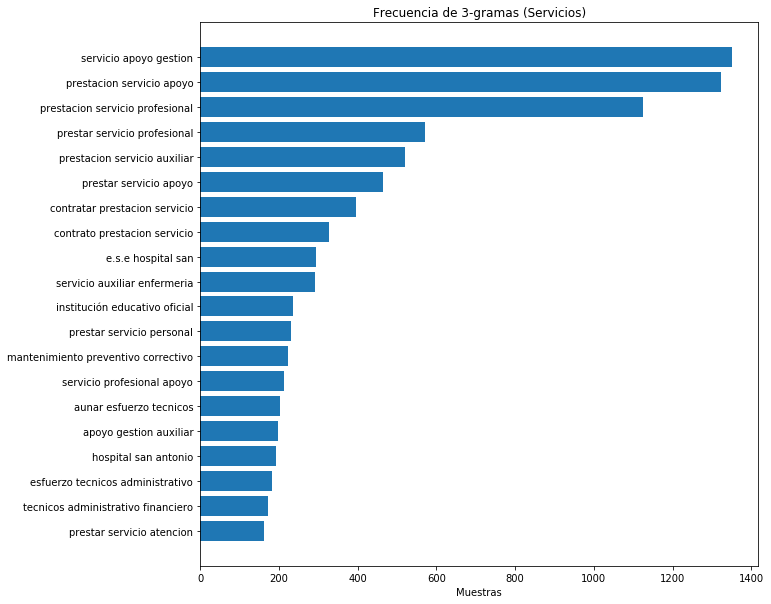

('G', 'Terrenos, Edificios, Estructuras y Vias')


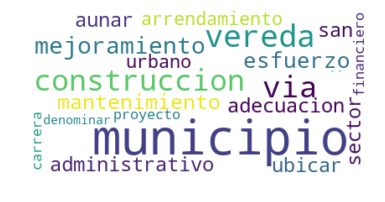

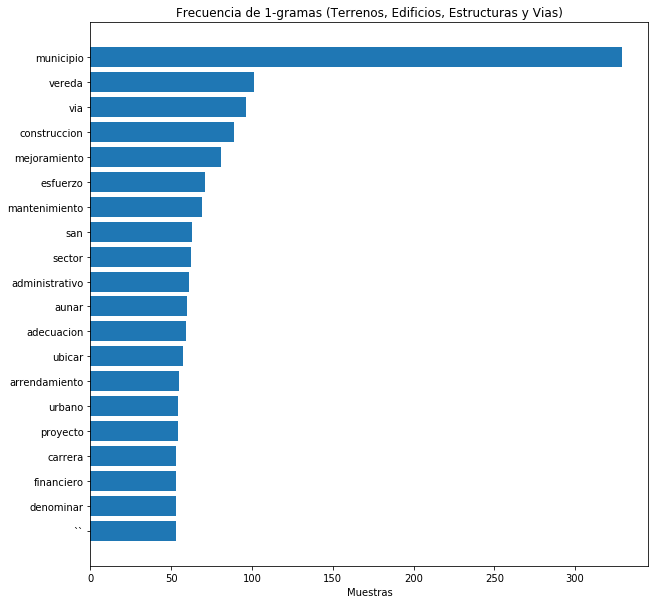

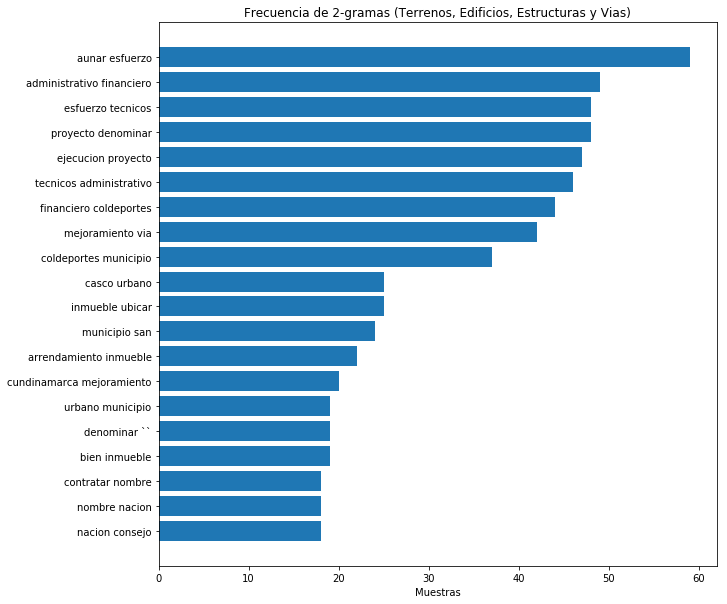

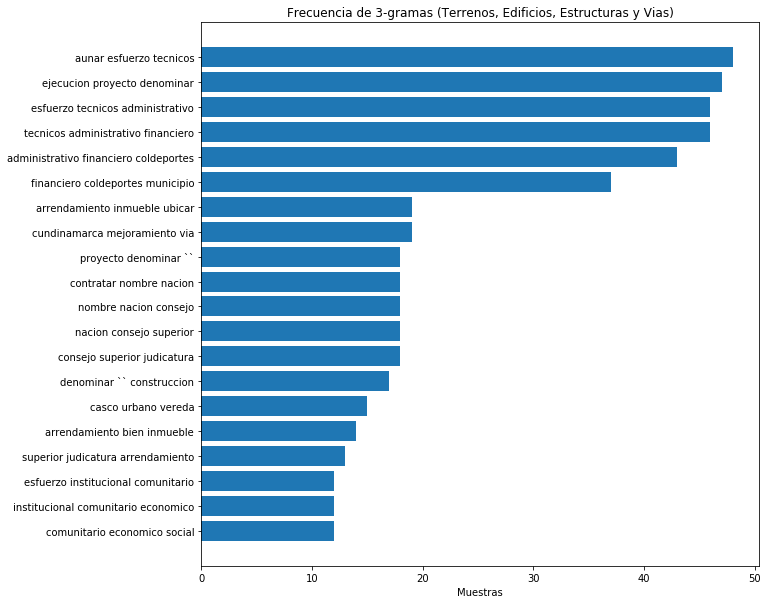

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pattern.es as lem

list_categories = [
    ('A', 'Material Vivo Animal y Vegetal'),
    ('B', 'Materias Primas'),
    ('C', 'Maquinaria, Herramientas, Equipo Industrial y Vehículos'),
    ('D', 'Componentes y Suministros'),
    ('E', 'Productos de Uso Final'),
    ('F', 'Servicios'),
    ('G', 'Terrenos, Edificios, Estructuras y Vias')
]

for category in list_categories:
    print(category)
    samples = dataframe.loc[dataframe['categoria'] == category[0]]
    samples = samples['descripcion_filtrado'].values

    whole = ' '.join(samples).casefold()
    whole = ' '.join(lem.Sentence(lem.parse(whole, lemmata=True)).lemmata)

    stop_words = set(stopwords.words('spanish'))
    word_tokens = word_tokenize(whole)
    filtered_whole = []

    for w in word_tokens:
        if w not in stop_words and w not in [',', '.', '-', '_']:
            filtered_whole.append(w)

    for i in range(1, 4):
        n_grams = ngrams(filtered_whole, i)
        result = collections.Counter(n_grams).most_common(20)

        labels = []
        values = []
        for label, value in result:
            labels.append(' '.join(label))
            values.append(value)
            
        if i == 1:
            words_dict = dict(zip(labels, values))
            wordcloud = WordCloud(background_color='white')
            wordcloud.generate_from_frequencies(words_dict)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis("off")

        plt.figure(figsize=(10, 10))
        plt.barh(labels, values)
        plt.title('Frecuencia de {}-gramas ({})'.format(i, category[1]))
        plt.xlabel('Muestras')
        plt.gca().invert_yaxis()
        plt.show()